In [28]:
!pip3 install numpy sympy matplotlib

In [29]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Определяем переменные
x, y = sp.symbols('x y')

# Тестовые функции
styblinski_tang_function = 0.5 * (x**4 - 16*x**2 + 5*x + y**4 - 16*y**2 + 5*y)
rosenbrock_function = (1 - x)**2 + 100 * (y - x**2)**2
eggholder_function = -(y + 47) * sp.sin(sp.sqrt(sp.abs(x/2 + y + 47))) - x * sp.sin(sp.sqrt(sp.Abs(x - (y + 47))))

# Градиенты функций
styblinski_tang_grad = [sp.diff(styblinski_tang_function, var) for var in [x, y]]
rosenbrock_grad = [sp.diff(rosenbrock_function, var) for var in [x, y]]

# Преобразование в функции для численных расчетов
styblinski_tang_grad_func = sp.lambdify([x, y], styblinski_tang_grad, 'numpy')
rosenbrock_grad_func = sp.lambdify([x, y], rosenbrock_grad, 'numpy')


PrintMethodNotImplementedError: Unsupported by <class 'sympy.printing.numpy.NumPyPrinter'>: <class 'sympy.core.function.Derivative'>
Set the printer option 'strict' to False in order to generate partially printed code.

In [31]:
# Градиентный спуск
def gradient_descent_sympy(func_grad, initial_point, learning_rate=0.01, max_iters=100, tolerance=1e-6):
    point = np.array(initial_point, dtype=float)
    history = [point.copy()]
    
    for _ in range(max_iters):
        gradient = np.array(func_grad(*point)).flatten()
        new_point = point - learning_rate * gradient
        history.append(new_point.copy())
        
        # Проверка на сходимость
        if np.linalg.norm(new_point - point) < tolerance:
            break
        
        point = new_point
    
    return point, history

In [32]:
# Пример для функции Стыбинского-Танга
final_point_styblinski_tang, history_styblinski_tang = gradient_descent_sympy(
    func_grad=lambda x, y: styblinski_tang_grad_func(x, y),
    initial_point=[-2, 2],
    learning_rate=0.01
)

# Пример для функции Розенброка
final_point_rosenbrock, history_rosenbrock = gradient_descent_sympy(
    func_grad=lambda x, y: rosenbrock_grad_func(x, y),
    initial_point=[-1.5, 2],
    learning_rate=0.001
)


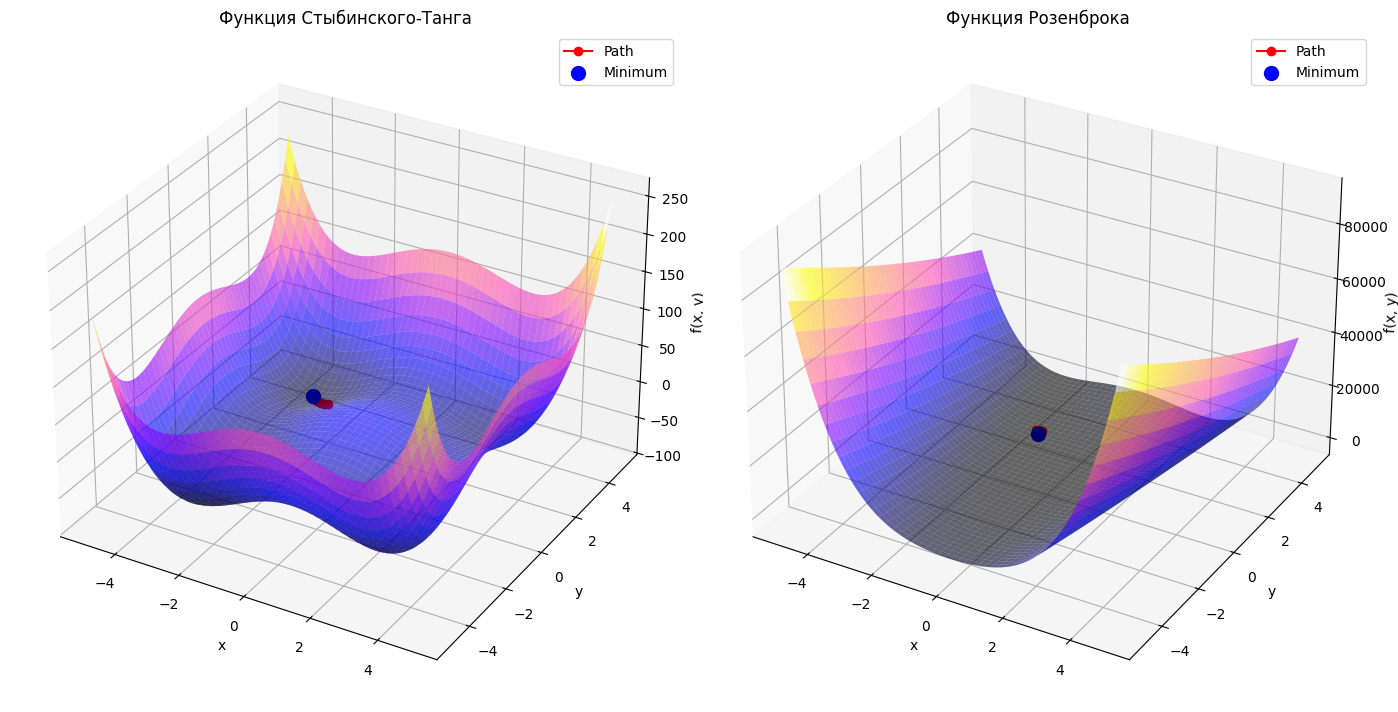

In [50]:
# Визуализация
fig = plt.figure(figsize=(14, 7))

# Функция Стыбинского-Танга
ax1 = fig.add_subplot(121, projection='3d')
X, Y = np.meshgrid(np.linspace(-5, 5, 400), np.linspace(-5, 5, 400))
Z = sp.lambdify([x, y], styblinski_tang_function, 'numpy')(X, Y)
ax1.plot_surface(X, Y, Z, alpha=0.6, cmap="gnuplot2")
history_styblinski_tang = np.array(history_styblinski_tang)
ax1.plot(history_styblinski_tang[:, 0], history_styblinski_tang[:, 1], 
         sp.lambdify([x, y], styblinski_tang_function, 'numpy')(history_styblinski_tang[:, 0], history_styblinski_tang[:, 1]), 
         color="red", marker='o', label="Path")
# Подсветка точки минимума
ax1.scatter(final_point_styblinski_tang[0], final_point_styblinski_tang[1], 
            sp.lambdify([x, y], styblinski_tang_function, 'numpy')(final_point_styblinski_tang[0], final_point_styblinski_tang[1]),
            color="blue", s=100, label="Minimum")
ax1.set_title("Функция Стыбинского-Танга")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("f(x, y)")
ax1.legend()

# Функция Розенброка
ax2 = fig.add_subplot(122, projection='3d')
Z = sp.lambdify([x, y], rosenbrock_function, 'numpy')(X, Y)
ax2.plot_surface(X, Y, Z, alpha=0.6, cmap="gnuplot2")
history_rosenbrock = np.array(history_rosenbrock)
ax2.plot(history_rosenbrock[:, 0], history_rosenbrock[:, 1], 
         sp.lambdify([x, y], rosenbrock_function, 'numpy')(history_rosenbrock[:, 0], history_rosenbrock[:, 1]), 
         color="red", marker='o', label="Path")
# Подсветка точки минимума
ax2.scatter(final_point_rosenbrock[0], final_point_rosenbrock[1], 
            sp.lambdify([x, y], rosenbrock_function, 'numpy')(final_point_rosenbrock[0], final_point_rosenbrock[1]),
            color="blue", s=100, label="Minimum")
ax2.set_title("Функция Розенброка")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("f(x, y)")
ax2.legend()

plt.tight_layout()
plt.show()